In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sn
from sklearn.metrics import accuracy_score
%matplotlib inline

# Reading dataset into a variable

In [2]:
df1 = pd.read_csv('spambase.data')

In [3]:
df1

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
# assigning column names
with open('./spambase.names') as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
df2 = pd.read_csv('./spambase.data', header=None, names=labels +['spam'])
df2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Cleaning duplicate values

In [5]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

In [6]:
df2.drop_duplicates(inplace=True)

In [7]:
df2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Visualizing outliers

<Figure size 10000x5000 with 0 Axes>

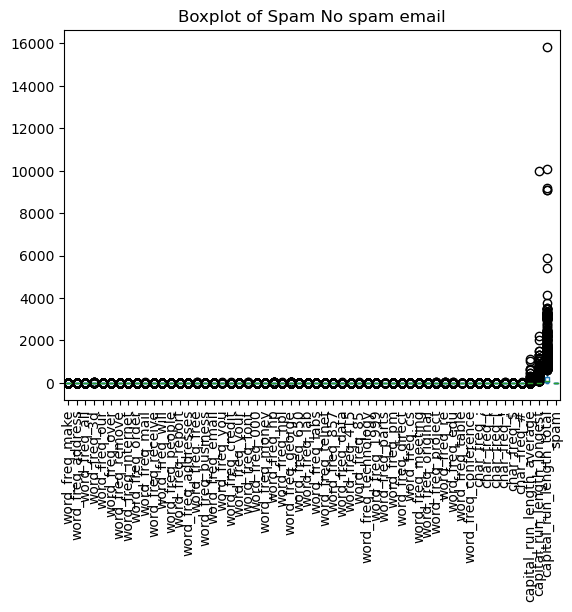

In [8]:
fig = plt.figure(figsize =(100, 50))
df2.plot.box(title='Boxplot of Spam No spam email',rot=90)

plt.show()

<AxesSubplot:xlabel='capital_run_length_total'>

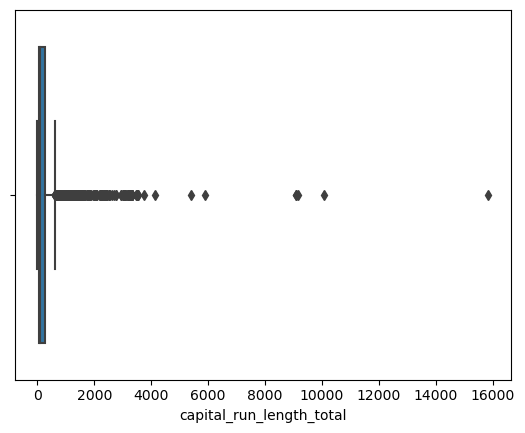

In [9]:
sn.boxplot(x = df2['capital_run_length_total'])

<AxesSubplot:xlabel='capital_run_length_average'>

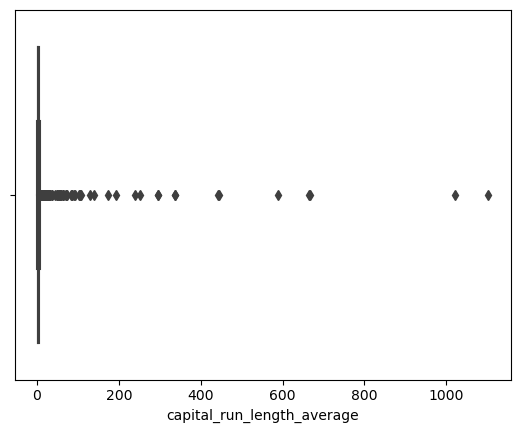

In [10]:
sn.boxplot(x = df2['capital_run_length_average'])

<AxesSubplot:xlabel='capital_run_length_longest'>

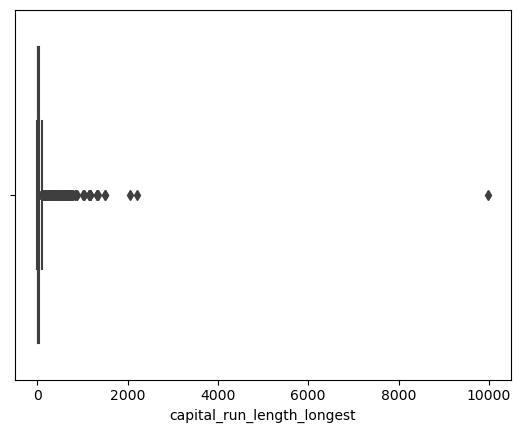

In [11]:
sn.boxplot(x = df2['capital_run_length_longest'])

In [12]:
# assigning NaN to outliers 
for x in ['capital_run_length_total','capital_run_length_longest','capital_run_length_average']:
    q75,q25 = np.percentile(df2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan

In [13]:
df2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,NaN,NaN,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,NaN,NaN,NaN,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,88.0,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,14.0,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,118.0,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,78.0,0


In [14]:
df2.isna().sum().any()

True

In [15]:
df2.isna().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

In [16]:
# dropping null values
df3=df2.dropna()
df3=df2.dropna(axis=0)

# Reset index after drop
df3=df2.dropna().reset_index(drop=True)

df2 = df3
df3

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


<AxesSubplot:xlabel='capital_run_length_total'>

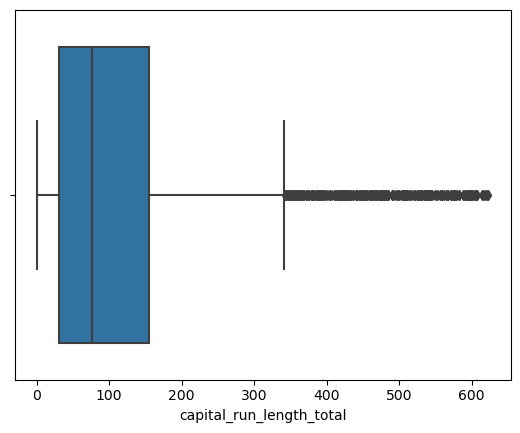

In [17]:
sn.boxplot(x = df2['capital_run_length_total'])

<AxesSubplot:xlabel='capital_run_length_average'>

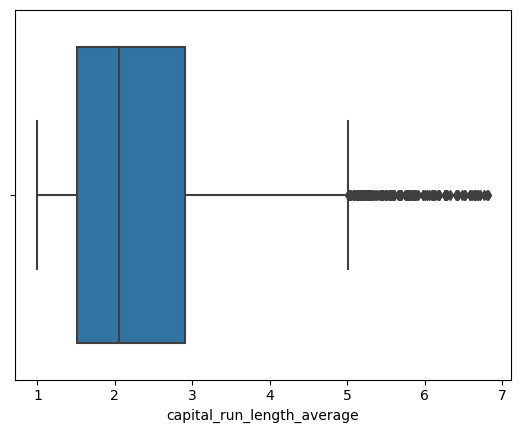

In [18]:
sn.boxplot(x = df2['capital_run_length_average'])

<AxesSubplot:xlabel='capital_run_length_longest'>

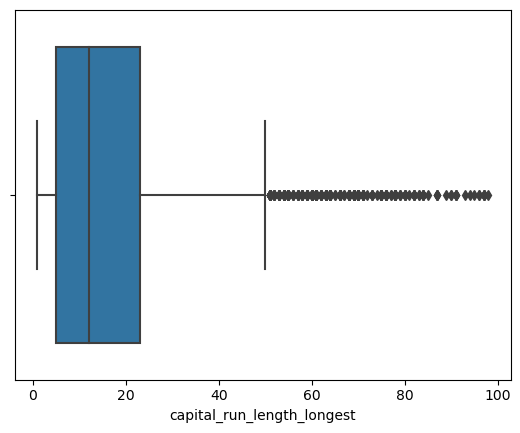

In [19]:
sn.boxplot(x = df2['capital_run_length_longest'])

In [20]:
# difining target variable
y = df3.iloc[:, 57].values

In [21]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
# difining input variables
x = df3.loc[:, df3.columns!='spam']

In [23]:
x

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0


In [24]:
x.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.038328,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.326526,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000


In [25]:
#Standardize features by subtracting the mean and dividing by the standard deviation.
#z = (x - u) / s
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [26]:
df4=pd.DataFrame(data=scaled_data, columns= x.columns)
df4

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.305981,1.153245,0.701909,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.685993,-0.266006,-0.07316,1.198328,2.265098,1.205883
1,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.042229,-0.153514,-0.121477,-0.266006,-0.07316,1.009960,1.145009,0.538555
2,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.050422,-0.153514,-0.123996,-0.266006,-0.07316,1.009960,1.145009,0.538555
3,-0.305981,-0.195373,-0.505857,-0.043154,2.196817,-0.303297,-0.263181,4.173219,-0.214868,-0.346011,...,-0.1174,-0.155346,0.310064,-0.153514,-0.294056,-0.266006,-0.07316,0.548074,-0.188431,-0.512294
4,-0.305981,-0.195373,-0.505857,-0.043154,2.296554,-0.303297,-0.263181,-0.228820,-0.214868,0.755535,...,-0.1174,-0.155346,-0.382233,-0.153514,-0.087465,0.012040,-0.07316,-0.595032,-0.775144,-0.067409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.694807,-0.195373,0.664166,-0.043154,-0.439092,0.799382,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,0.346932,-0.153514,-0.294056,-0.266006,-0.07316,-1.050038,-0.828481,-0.251499
3442,-0.305981,-0.195373,-0.505857,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.150619,-0.266006,-0.07316,-0.694806,-0.775144,-0.819111
3443,0.662524,-0.195373,0.060283,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,0.319285,2.337799,-0.153514,-0.294056,-0.266006,-0.07316,-0.824685,-0.668469,-0.021386
3444,2.793236,-0.195373,-0.505857,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.369944,-0.153514,-0.294056,-0.266006,-0.07316,-1.045737,-0.721806,-0.328204


In [27]:
df4.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,...,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03
mean,1.906919e-15,-4.400459e-16,6.484785e-16,-5.201674e-16,-4.045146e-15,-1.406014e-15,-1.210717e-14,1.584065e-15,4.067150e-15,-7.056650e-16,...,2.352788e-15,2.911178e-15,1.163286e-15,-1.355787e-15,-9.867405e-16,4.202739e-15,3.410247e-17,8.189747e-17,6.437103e-17,-1.803871e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,...,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-1.172176e+00,-9.351566e-01,-9.188270e-01
25%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-7.348022e-01,-7.218063e-01,-6.887140e-01
50%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-3.330760e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-2.656043e-01,-3.484433e-01,-3.435446e-01
75%,-3.059813e-01,-1.953730e-01,1.735113e-01,-4.315372e-02,7.384151e-02,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,2.322319e-01,-1.535136e-01,4.493408e-03,-2.660056e-01,-7.316004e-02,4.698022e-01,2.382701e-01,2.624196e-01
max,1.435073e+01,2.989567e+01,9.118532e+00,5.239393e+01,1.380907e+01,2.061203e+01,2.015906e+01,2.620720e+01,2.340938e+01,1.877615e+01,...,3.051252e+01,2.024913e+01,2.101344e+01,3.607177e+01,4.061861e+01,3.064342e+01,4.306921e+01,3.835470e+00,4.238588e+00,3.852182e+00


# Principal Componant Annalysis 

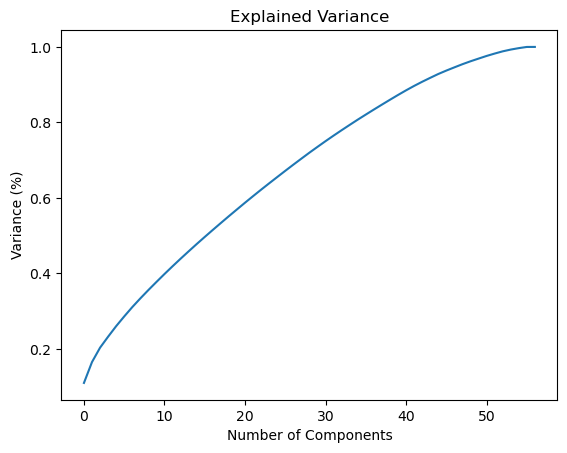

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df4)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [29]:
# dropping out the components which have higher variances and selecting 45 components
pca = PCA(n_components=45)
new_data = pca.fit_transform(df4)
# This will be the new data fed to the algorithm.
df5 = pd.DataFrame(data = new_data)

In [30]:
df5

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-1.006857,1.802152,0.718603,0.075104,-0.217667,-0.058690,-1.193236,-0.852828,1.059967,0.868128,...,0.225692,0.054279,0.543152,-0.016071,0.164477,-0.110166,0.044626,-0.535739,-0.320060,-0.515934
1,-0.985097,1.538500,0.306285,-0.027349,-0.287020,-0.185419,-0.690259,0.207743,-0.356720,-0.197856,...,-0.600421,0.333930,0.341935,-0.794601,0.293528,-0.134611,0.074866,0.328293,-0.537158,-0.597508
2,-0.986344,1.538184,0.305695,-0.026639,-0.287299,-0.184847,-0.690871,0.206874,-0.356992,-0.199402,...,-0.599328,0.331438,0.344849,-0.795784,0.294840,-0.132302,0.074321,0.327659,-0.536743,-0.596836
3,-0.589457,-0.147096,-0.010576,0.294627,-0.673055,-0.411102,0.165605,0.738221,-1.293622,-0.064167,...,-1.154362,1.043801,0.806643,-0.761827,1.203771,0.437161,-0.706726,0.287148,-0.544177,-0.853042
4,-1.147370,0.762938,-1.665261,0.687290,-0.063357,1.574470,-1.343798,-0.179887,-0.196682,-0.557068,...,-0.336565,1.360211,-0.602507,0.106671,0.536692,0.400808,1.110392,-0.398612,0.419738,-0.011438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-0.541647,-1.320158,-0.551831,0.452444,-0.288103,-0.497813,0.169154,0.147463,0.376762,-0.867542,...,0.472528,0.451878,-0.338666,-0.312292,-0.304200,0.255547,-0.393080,0.156944,0.328527,0.069404
3442,-0.934433,-0.987027,-1.271984,-0.126781,1.537216,-0.243500,-0.066380,0.812468,0.844506,-0.507207,...,0.439450,-0.279595,0.525545,1.114586,0.493007,-0.992944,0.111092,0.164260,-0.051510,-0.448345
3443,-0.279227,-0.860494,-0.162324,0.119447,0.155817,-0.202291,0.133924,-0.148513,1.331358,-0.828540,...,0.497153,1.001028,-1.004871,0.378601,-0.562087,-0.698256,-0.593421,0.173494,-0.022740,-0.650745
3444,-0.713477,-1.124775,-0.833386,0.310052,0.308562,-0.316067,-0.124843,0.220833,0.415807,-0.398632,...,-0.206200,0.036896,0.915857,-0.093180,0.185847,-0.436035,-0.194990,-0.241850,-0.131393,0.009359


# K Nearest Neighbor 

In [31]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df5, y, test_size = 0.25, random_state = 0)

In [32]:
# Fitting classifier to the Training set
# p means euclidian distance
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [33]:
# accuracy of test data
classifier.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8932714617169374

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
# accuracy of traing data
predictions_train_knn = classifier.predict(X_train)
accuracy_score(y_train, predictions_train_knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9287925696594427

# Confusion matrix for KNN

In [36]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[543,  26],
       [ 66, 227]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

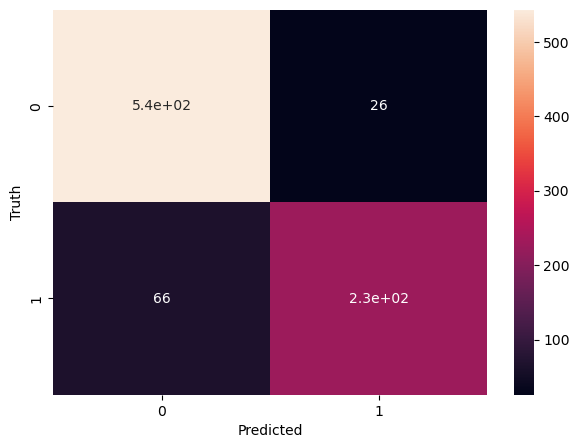

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification report for KNN

In [38]:
from sklearn.metrics import classification_report
report_knn = classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       569
           1       0.90      0.77      0.83       293

    accuracy                           0.89       862
   macro avg       0.89      0.86      0.88       862
weighted avg       0.89      0.89      0.89       862



# Decition Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# train test split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(df5, y, test_size=0.3, random_state=3)

In [42]:
# defining decition tree classifier
# Here I have took a lower value to max depth parameter to reduce overfitting 
DTclassifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTclassifier 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
# training decition tree classifier
DTclassifier.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [44]:
# accuracy of test data
predictions_test = DTclassifier.predict(X_testset)
accuracy_score(y_testset, predictions_test)

0.8936170212765957

In [45]:
# accuracy of train data
predictions_train = DTclassifier.predict(X_trainset)
accuracy_score(y_trainset,predictions_train)

0.8731343283582089

In [46]:
predTree = DTclassifier.predict(X_testset)

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy of the above trained decition tree is : ", metrics.accuracy_score(y_testset, predTree))

Accuracy of the above trained decition tree is :  0.8936170212765957


In [48]:
y_pred_dt = DTclassifier.predict(X_testset)

# Confusion matrix for decition tree

In [49]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_testset, y_pred_dt)
cm2

array([[683,  31],
       [ 79, 241]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

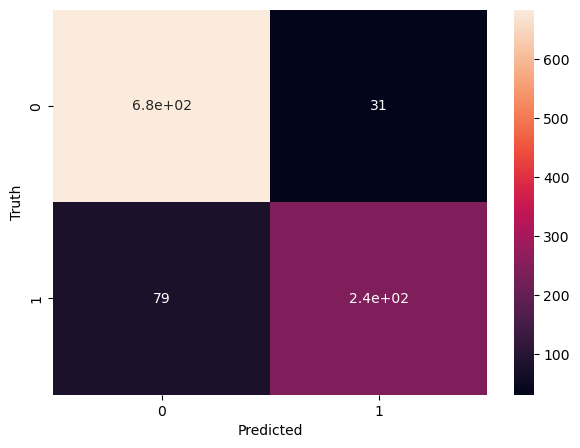

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification report for decition tree

In [51]:
report_DT = classification_report(y_testset, y_pred_dt)
print(report_DT)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       714
           1       0.89      0.75      0.81       320

    accuracy                           0.89      1034
   macro avg       0.89      0.85      0.87      1034
weighted avg       0.89      0.89      0.89      1034



# Visualizing decision tree

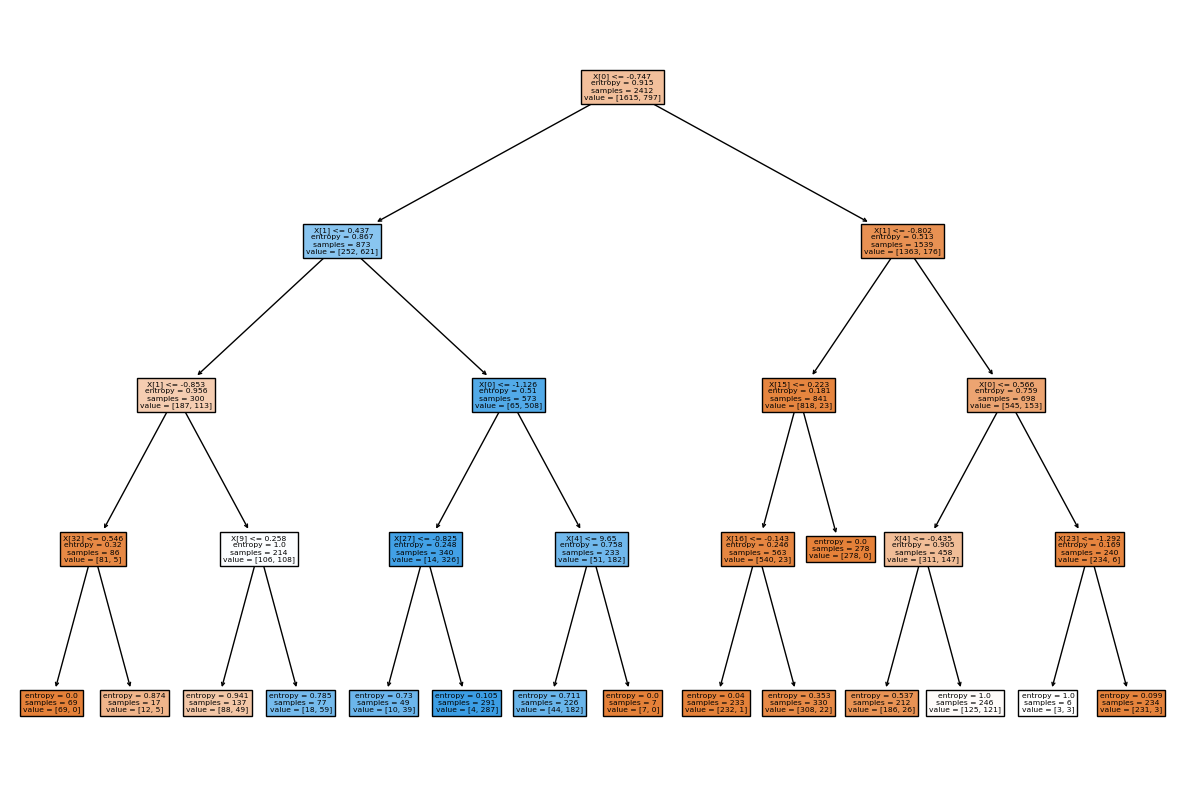

In [52]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(DTclassifier,filled=True)
plt.show()

In [53]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [54]:
dt_probs = DTclassifier.predict_proba(X_testset)[:,1]
dt_probs

array([0.12264151, 0.9862543 , 0.79591837, ..., 0.00429185, 0.00429185,
       0.12264151])

In [55]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_testset,dt_probs)

# Plotting ROC curve

In [56]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.9398503151260504

In [57]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

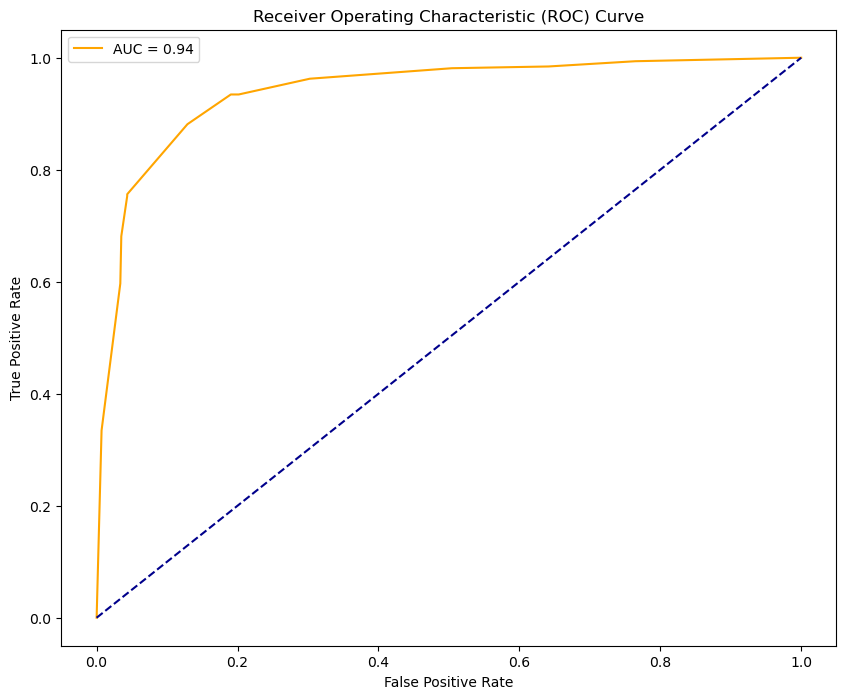

In [58]:
plot_roc_curve(fpr_dt,tpr_dt)